In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gzip
import json
import glob
from collections import Counter

In [15]:
df = pd.read_csv("all_data_minimal.csv", parse_dates=['created_at'])
df

,created_at,author_id,in_reply_to_user_id,mentions_count,mentions
0,2022-01-21 23:36:56+00:00,1432919429831020552,NaN,3,"['233058170', '878284831', '828035864278151168']"
1,2022-01-21 23:35:43+00:00,1432919429831020552,NaN,2,"['1382839661811351553', '878284831']"
2,2022-01-21 23:35:39+00:00,1432919429831020552,NaN,2,"['213134269', '878284831']"
3,2022-01-21 23:35:33+00:00,1432919429831020552,NaN,2,"['1293160564483665920', '878284831']"
4,2022-01-21 23:35:27+00:00,1432919429831020552,NaN,2,"['1162118566226878469', '878284831']"
...,...,...,...,...,...
14060530,2022-02-14 18:16:03+00:00,871399252815204354,NaN,1,['372536101']
14060531,2022-02-14 18:15:06+00:00,9677372,NaN,0,[]
14060532,2022-02-14 18:14:32+00:00,951690486917582850,NaN,2,"['337925974', '87151593']"
14060533,2022-02-14 18:14:28+00:00,871399252815204354,NaN,1,['1205226529455632385']


In [16]:
df.columns

Index(['created_at', 'author_id', 'in_reply_to_user_id', 'mentions_count',
       'mentions'],
      dtype='object')

<Axes: xlabel='created_at'>

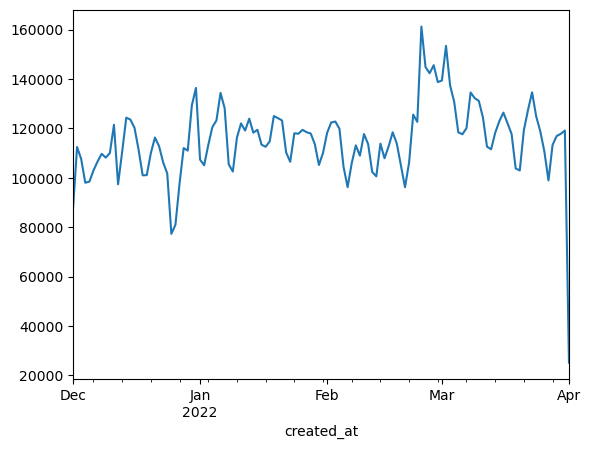

In [17]:
df.set_index("created_at").resample("D").size().plot()

In [92]:
def read_tweets_from_gzip(file_path):
    tweets = []
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            # Twitter API v2 uses 'data' -> 'text', while v1.1 uses 'full_text' or 'text'
            if "data" in data:
                for dataItem in data["data"]:
                    tweets.append((
                        dataItem.get("created_at", ""),
                        dataItem.get("author_id", ""),
                        dataItem.get("text", ""),
                        dataItem.get("in_reply_to_user_id", "")
                    ))
    df = pd.DataFrame(tweets, columns=["created_at", "author_id", "text", "in_reply_to_user_id"])
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['hashtags'] = df['text'].str.findall(r'#\w+')
    return df


In [103]:
files_list = glob.glob("./cache2/querylist_*.json.gzip")
len(files_list)

29317

In [110]:
df = pd.concat([read_tweets_from_gzip(f) for f in files_list])
df

C:\Users\pog66\AppData\Local\Temp\ipykernel_52092\1842349922.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])
C:\Users\pog66\AppData\Local\Temp\ipykernel_52092\1842349922.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])
C:\Users\pog66\AppData\Local\Temp\ipykernel_52092\1842349922.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])
C:\Users\pog66\AppData\Local\Temp\ipykernel_52092\1842349922.py:16: UserWarning: C

,created_at,author_id,text,in_reply_to_user_id,hashtags
0,2022-04-01 04:58:38+00:00,1385729645740449804,@Peroporqu_ :),1500536286591033351,[]
1,2022-04-01 04:56:47+00:00,4501930040,RT @purpleluvrain: @jlints58 love it dear swee...,,[]
2,2022-04-01 04:56:23+00:00,28729354,@StephanieNTX @dfwhispanic @Raquel_AmparoTV @S...,3173688997,[]
3,2022-04-01 04:55:32+00:00,4501930040,@SFDamnPodcast @alvatabitha I've been wonderin...,1248074962377699328,[]
4,2022-04-01 04:55:00+00:00,4501930040,RT @SFDamnPodcast: @alvatabitha @jlints58 a gr...,,[]
...,...,...,...,...,...
386,2021-12-01 05:38:24+00:00,25444322,#GetVaccinated https://t.co/MHvXKKv5Fv,,[#GetVaccinated]
387,2021-12-01 05:37:57+00:00,25444322,RT @UncvrngTheTruth: Jim Jordan said Biden thi...,,[]
388,2021-12-01 05:25:36+00:00,40091601,@SoCassandra another family star,48928145,[]
389,2021-12-01 05:23:12+00:00,40091601,@dmschmeyer *saves*,732409522778742784,[]


In [111]:
df.to_csv("all_data_minimal_with_hashtags.csv", index=False)

In [112]:
def get_hashtag_counts_df(t):
    hashtag_list = [hashtag for hashtags in t['hashtags'] for hashtag in hashtags]
    hashtag_counts = Counter(hashtag_list)
    hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['hashtag', 'count']).sort_values(by='count', ascending=False)
    return hashtag_df

get_hashtag_counts_df(df)

,hashtag,count
176,#Ukraine,54331
105,#COVID19,31835
1380,#NowPlaying,28003
696,#Russia,26147
3149,#ClimateAction,19640
...,...,...
114112,#BettyWhiteIsDoingTheRi,1
325928,#InstagramDown,1
114113,#BostonLegal,1
325926,#GetGreggAbbottOut,1


In [114]:
df_covid19 = df[df['hashtags'].apply(lambda hashtags: "#COVID19" in hashtags)]
df_covid19

,created_at,author_id,text,in_reply_to_user_id,hashtags
388,2022-03-31 20:22:08+00:00,218538023,RT @APPRISE_CRE: #COVID19 and #flu – an especi...,,"[#COVID19, #flu, #influenza, #COVID19Aus]"
393,2022-03-31 20:20:44+00:00,218538023,"RT @CIDRAP: New ""Osterholm Update: COVID-19"" p...",,[#COVID19]
395,2022-03-31 20:19:45+00:00,218538023,RT @CIDRAP: A lot of #COVID19 research reporti...,,[#COVID19]
124,2022-03-31 12:29:30+00:00,218538023,RT @CIDRAP: Global #COVID19 cases ebb amid tes...,,[#COVID19]
126,2022-03-31 12:28:10+00:00,218538023,RT @CIDRAP: White House launches 'one-stop' we...,,[#COVID19]
...,...,...,...,...,...
447,2021-12-02 15:21:10+00:00,15570694,The wonderful @HC_Richardson concisely summari...,,[#COVID19]
15,2021-12-02 12:24:23+00:00,982564830,RT @awong37: Great news. The US has given ~4.2...,,[#COVID19]
146,2021-12-01 22:02:19+00:00,982564830,RT @morethanmySLE: #DrOz SUGGESTED in April 20...,,"[#DrOz, #COVID19]"
186,2021-12-01 19:50:52+00:00,982564830,RT @CDCgov: #Parents: Everyone ages 5 years an...,,"[#Parents, #COVID19]"


c:\Users\pog66\.conda\envs\main\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


<Axes: xlabel='created_at'>

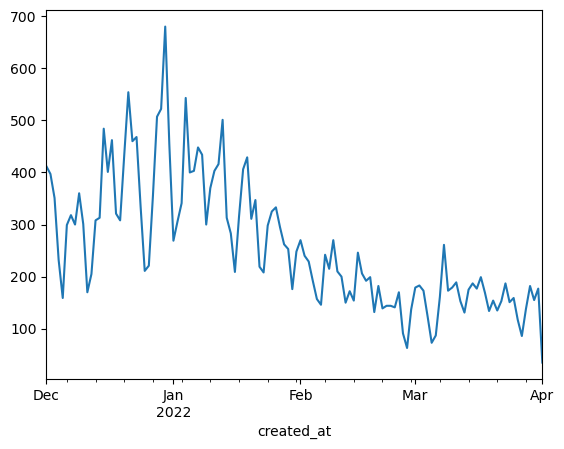

In [119]:
df_covid19.set_index("created_at").resample("D").size().plot()

In [120]:
user_post_count = df_covid19["author_id"].value_counts().rename_axis("author_id").rename("post_count").reset_index()
user_post_count

,author_id,post_count
0,29097819,1064
1,736710115,806
2,4937061,578
3,38978291,570
4,146569971,467
...,...,...
1540,31895836,1
1541,620255756,1
1542,41916943,1
1543,311187995,1


In [131]:
user_rr_count = df_covid19["in_reply_to_user_id"].value_counts().rename_axis("author_id").rename("received_retweets_count").reset_index().drop(0) # drop NaN
user_rr_count

,author_id,received_retweets_count
1,80483638,290
2,146569971,61
3,36167088,52
4,620136960,42
5,17919393,38
...,...,...
753,268326056,1
754,1108149693874225152,1
755,1217198127591186437,1
756,18149465,1


In [132]:
user_rrpp = user_rr_count.set_index('author_id').join(
    user_post_count.set_index('author_id'), how='outer'
).fillna(0)
user_rrpp['rr_per_post'] = user_rrpp['received_retweets_count'] / (user_rrpp['post_count'] + 1)
user_rrpp = user_rrpp.reset_index().sort_values(by='rr_per_post', ascending=False)
user_rrpp

,author_id,received_retweets_count,post_count,rr_per_post
321,1295803342162210817,21.0,0.0,21.0
903,20525702,19.0,0.0,19.0
880,19834403,15.0,0.0,15.0
1371,3180247177,13.0,0.0,13.0
302,1282853745945202688,11.0,0.0,11.0
...,...,...,...,...
943,21612122,0.0,6.0,0.0
942,2158643891,0.0,1.0,0.0
941,2157244796,0.0,23.0,0.0
940,21544108,0.0,2.0,0.0


In [134]:
user_rrpp_valid = user_rrpp[user_rrpp['author_id'].isin(user_post_count['author_id'])].sort_values(by='rr_per_post', ascending=False)
user_rrpp_valid

,author_id,received_retweets_count,post_count,rr_per_post
1985,80483638,290.0,400.0,0.723192
1875,720959701651996673,21.0,31.0,0.656250
726,169353953,4.0,6.0,0.571429
403,1352311853263671296,3.0,5.0,0.500000
1606,4311670299,1.0,1.0,0.500000
...,...,...,...,...
1635,44947517,0.0,19.0,0.000000
1633,4481687056,0.0,423.0,0.000000
1609,433748479,0.0,1.0,0.000000
1610,4341832332,0.0,1.0,0.000000


In [249]:
selected_users_rrpp = user_rrpp_valid[user_rrpp_valid['rr_per_post'] > 0.3]
selected_users_rrpp

,author_id,received_retweets_count,post_count,rr_per_post
1985,80483638,290.0,400.0,0.723192
1875,720959701651996673,21.0,31.0,0.656250
726,169353953,4.0,6.0,0.571429
403,1352311853263671296,3.0,5.0,0.500000
1606,4311670299,1.0,1.0,0.500000
1478,359528910,1.0,1.0,0.500000
740,17146256,1.0,1.0,0.500000
47,1047247402409840640,1.0,1.0,0.500000
1453,344350643,1.0,1.0,0.500000
775,179226033,1.0,1.0,0.500000


In [142]:
user_last_tweet_df = df_covid19.groupby('author_id')['created_at'].max().reset_index().rename(columns={'created_at': 'last_tweet'})
user_last_tweet_df

,author_id,last_tweet
0,1003139946,2022-03-11 14:15:48+00:00
1,1004065528871247872,2022-03-31 00:55:08+00:00
2,1005142093369675777,2022-02-08 22:09:12+00:00
3,1006734899837980672,2022-01-27 22:22:55+00:00
4,100701580,2021-12-26 01:47:50+00:00
...,...,...
1540,995877126464303104,2021-12-08 16:11:50+00:00
1541,996423161053876224,2022-03-24 14:59:44+00:00
1542,99666729,2021-12-26 15:51:27+00:00
1543,997931370,2022-03-31 14:45:11+00:00


In [144]:
filtered_users = user_last_tweet_df[user_last_tweet_df["author_id"].isin( selected_users_rrpp["author_id"] )].sort_values(by='last_tweet', ascending=False)
filtered_users

,author_id,last_tweet
365,149197471,2022-04-01 03:52:00+00:00
1532,989320781799743488,2022-03-31 20:50:10+00:00
349,146569971,2022-03-31 20:00:11+00:00
1099,43369337,2022-03-31 16:09:52+00:00
1,1004065528871247872,2022-03-31 00:55:08+00:00
1446,877629044828667905,2022-03-31 00:07:57+00:00
1243,620136960,2022-03-30 20:22:23+00:00
1338,767945051787759616,2022-03-30 17:16:27+00:00
1005,36167088,2022-03-30 16:31:16+00:00
1371,80483638,2022-03-30 15:33:56+00:00


In [172]:
date_posts = df_covid19.set_index('created_at').resample('d').size().sort_index().reset_index(name='count')
date_posts

c:\Users\pog66\.conda\envs\main\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,created_at,count
0,2021-12-01 00:00:00+00:00,412
1,2021-12-02 00:00:00+00:00,397
2,2021-12-03 00:00:00+00:00,351
3,2021-12-04 00:00:00+00:00,232
4,2021-12-05 00:00:00+00:00,159
...,...,...
117,2022-03-28 00:00:00+00:00,138
118,2022-03-29 00:00:00+00:00,182
119,2022-03-30 00:00:00+00:00,155
120,2022-03-31 00:00:00+00:00,177


In [154]:
sorted_users_by_rrpp = [u for u in user_rrpp["author_id"] if u in filtered_users["author_id"].unique()]

In [163]:
sorted_filtered_users = filtered_users.set_index('author_id').loc[sorted_users_by_rrpp]['last_tweet'].reset_index()
sorted_filtered_users

,author_id,last_tweet
0,80483638,2022-03-30 15:33:56+00:00
1,720959701651996673,2022-02-08 23:01:34+00:00
2,169353953,2022-03-27 05:27:40+00:00
3,1352311853263671296,2022-02-17 22:58:21+00:00
4,4311670299,2022-02-05 14:19:36+00:00
5,359528910,2022-02-01 02:22:22+00:00
6,17146256,2021-12-25 16:40:26+00:00
7,1047247402409840640,2021-12-28 20:52:12+00:00
8,344350643,2022-01-25 21:37:47+00:00
9,179226033,2022-02-25 00:17:42+00:00


In [158]:
sorted_users_rrpp = user_rrpp.set_index('author_id').loc[sorted_users_by_rrpp]['rr_per_post']
sorted_users_rrpp

author_id
80483638               0.723192
720959701651996673     0.656250
169353953              0.571429
1352311853263671296    0.500000
4311670299             0.500000
359528910              0.500000
17146256               0.500000
1047247402409840640    0.500000
344350643              0.500000
179226033              0.500000
767945051787759616     0.470588
1457177169407393795    0.428571
26950458               0.400000
17919393               0.368932
620136960              0.350000
989313110602235904     0.333333
36167088               0.300578
898324652              0.285714
17018470               0.285714
1428158156098572291    0.250000
1004065528871247872    0.250000
877629044828667905     0.218310
20280574               0.215686
3173246967             0.200000
21833509               0.200000
989320781799743488     0.200000
149197471              0.200000
19201304               0.200000
239666710              0.200000
142843687              0.193548
14596185               0.16666

Index(['80483638', '720959701651996673', '169353953', '1352311853263671296',
       '4311670299', '359528910', '17146256', '1047247402409840640',
       '344350643', '179226033', '767945051787759616', '1457177169407393795',
       '26950458', '17919393', '620136960', '989313110602235904', '36167088',
       '898324652', '17018470', '1428158156098572291', '1004065528871247872',
       '877629044828667905', '20280574', '3173246967', '21833509',
       '989320781799743488', '149197471', '19201304', '239666710', '142843687',
       '14596185', '2498871378', '1421182643375427584', '33919623',
       '323920783', '36740674', '257663572', '294118241', '38282048',
       '146569971', '2167134798', '553010243', '15850297', '43369337',
       '709986828066144257'],
      dtype='object', name='author_id')

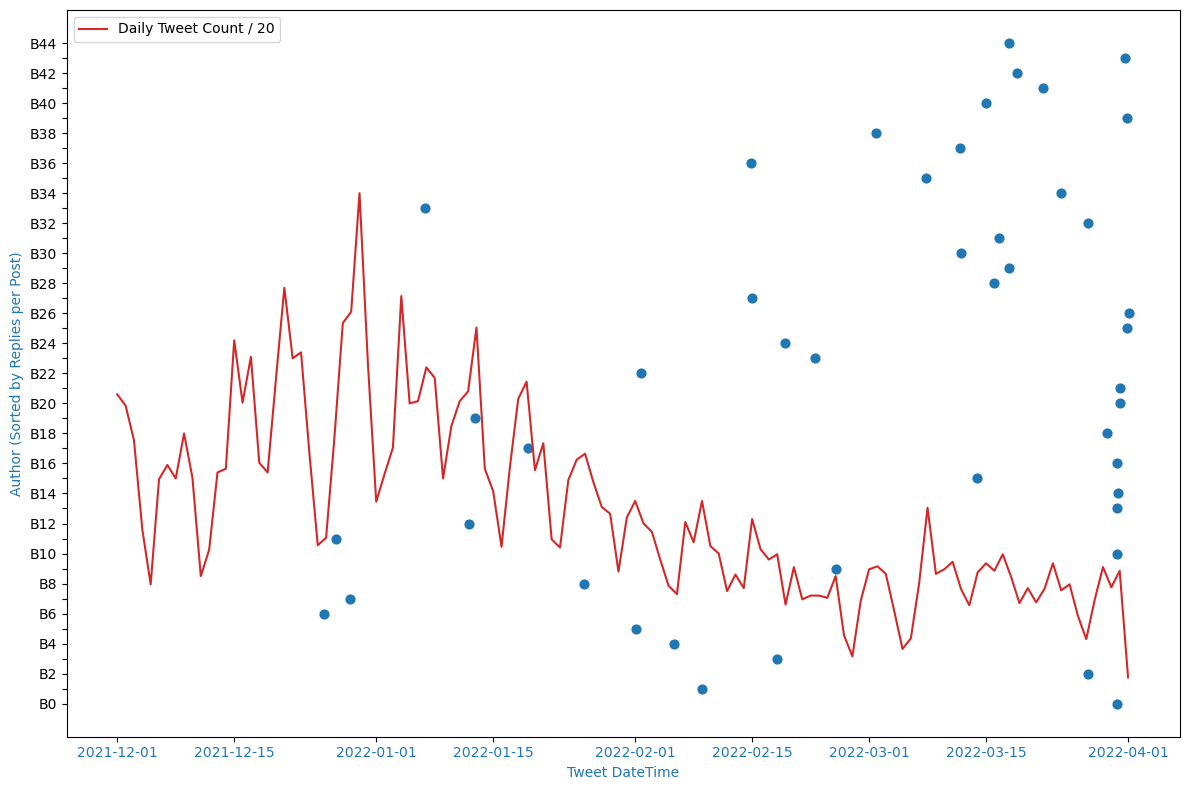

In [271]:
fig, ax1 = plt.subplots(figsize=(12,8))
color = 'tab:blue'
ax1.set_ylabel('Author (Sorted by Replies per Post)', color=color)
ax1.set_xlabel('Tweet DateTime', color=color)
yticklabels = []
for i, author in enumerate(sorted_filtered_users['author_id']):
    author_tweets = df_covid19[df_covid19['author_id'] == author].sort_values('created_at', ascending=False).head(1)
    ax1.scatter(author_tweets['created_at'], [author]*len(author_tweets), color=color, alpha=1, s=40)
    yticklabels.append(author)
ax1.tick_params(axis='x', labelcolor=color)
# Show every other user name for readability
yticks = ax1.get_yticks()
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"B{i}" if i%2==0 else '' for i, name in enumerate(yticklabels)])
color = 'tab:red'
ax1.plot(date_posts['created_at'], date_posts['count']/20, color=color, label='Daily Tweet Count / 20')
ax1.legend(loc='upper left')
#ax2 = ax1.twiny()
#color = 'tab:orange'
#ax2.set_xlabel('Tweet Volume', color=color)
#ax2.set_xscale('log')
#ax2.barh(sorted_filtered_users['author_id'], sorted_users_rrpp, alpha=0.3, color=color, label='Tweet Volume')
#ax2.tick_params(axis='x', labelcolor=color)
#plt.title('Comparison of Last Tweet DateTime of Users and Tweet Volume (Sorted by Replies per Post)')
fig.tight_layout()
plt.savefig("covid19_user_last_tweet_vs_rrpp.png", dpi=300)
plt.show()

In [194]:
sorted_users_rrpp[:8]

author_id
80483638               0.723192
720959701651996673     0.656250
169353953              0.571429
1352311853263671296    0.500000
4311670299             0.500000
359528910              0.500000
17146256               0.500000
1047247402409840640    0.500000
Name: rr_per_post, dtype: float64

In [195]:
sorted_filtered_users

,author_id,last_tweet
0,80483638,2022-03-30 15:33:56+00:00
1,720959701651996673,2022-02-08 23:01:34+00:00
2,169353953,2022-03-27 05:27:40+00:00
3,1352311853263671296,2022-02-17 22:58:21+00:00
4,4311670299,2022-02-05 14:19:36+00:00
5,359528910,2022-02-01 02:22:22+00:00
6,17146256,2021-12-25 16:40:26+00:00
7,1047247402409840640,2021-12-28 20:52:12+00:00
8,344350643,2022-01-25 21:37:47+00:00
9,179226033,2022-02-25 00:17:42+00:00


In [200]:
author_rrpp_data = pd.merge(sorted_users_rrpp, sorted_filtered_users, left_index=True, right_on='author_id').sort_values(by='rr_per_post', ascending=False)
author_rrpp_data

,rr_per_post,author_id,last_tweet
0,0.723192,80483638,2022-03-30 15:33:56+00:00
1,0.656250,720959701651996673,2022-02-08 23:01:34+00:00
2,0.571429,169353953,2022-03-27 05:27:40+00:00
3,0.500000,1352311853263671296,2022-02-17 22:58:21+00:00
4,0.500000,4311670299,2022-02-05 14:19:36+00:00
5,0.500000,359528910,2022-02-01 02:22:22+00:00
6,0.500000,17146256,2021-12-25 16:40:26+00:00
7,0.500000,1047247402409840640,2021-12-28 20:52:12+00:00
8,0.500000,344350643,2022-01-25 21:37:47+00:00
9,0.500000,179226033,2022-02-25 00:17:42+00:00


In [205]:
date_min = date_posts["created_at"].min()
date_max = date_posts["created_at"].max()
date_posts["timeline_norm"] = (date_posts["created_at"] - date_min) / (date_max - date_min)
date_posts

,created_at,count,timeline_norm
0,2021-12-01 00:00:00+00:00,412,0.000000
1,2021-12-02 00:00:00+00:00,397,0.008264
2,2021-12-03 00:00:00+00:00,351,0.016529
3,2021-12-04 00:00:00+00:00,232,0.024793
4,2021-12-05 00:00:00+00:00,159,0.033058
...,...,...,...
117,2022-03-28 00:00:00+00:00,138,0.966942
118,2022-03-29 00:00:00+00:00,182,0.975207
119,2022-03-30 00:00:00+00:00,155,0.983471
120,2022-03-31 00:00:00+00:00,177,0.991736


In [207]:
author_rrpp_data["last_tweet_norm"] = (author_rrpp_data["last_tweet"] - date_min) / (date_max - date_min)
author_rrpp_data["timeline_score"] = author_rrpp_data["rr_per_post"] * author_rrpp_data["last_tweet_norm"]
author_rrpp_data

,rr_per_post,author_id,last_tweet,last_tweet_norm,timeline_score
0,0.723192,80483638,2022-03-30 15:33:56+00:00,0.988831,0.715115
1,0.656250,720959701651996673,2022-02-08 23:01:34+00:00,0.578177,0.379429
2,0.571429,169353953,2022-03-27 05:27:40+00:00,0.960558,0.548890
3,0.500000,1352311853263671296,2022-02-17 22:58:21+00:00,0.652539,0.326269
4,0.500000,4311670299,2022-02-05 14:19:36+00:00,0.550388,0.275194
5,0.500000,359528910,2022-02-01 02:22:22+00:00,0.513214,0.256607
6,0.500000,17146256,2021-12-25 16:40:26+00:00,0.204089,0.102044
7,0.500000,1047247402409840640,2021-12-28 20:52:12+00:00,0.230327,0.115164
8,0.500000,344350643,2022-01-25 21:37:47+00:00,0.461994,0.230997
9,0.500000,179226033,2022-02-25 00:17:42+00:00,0.710845,0.355423


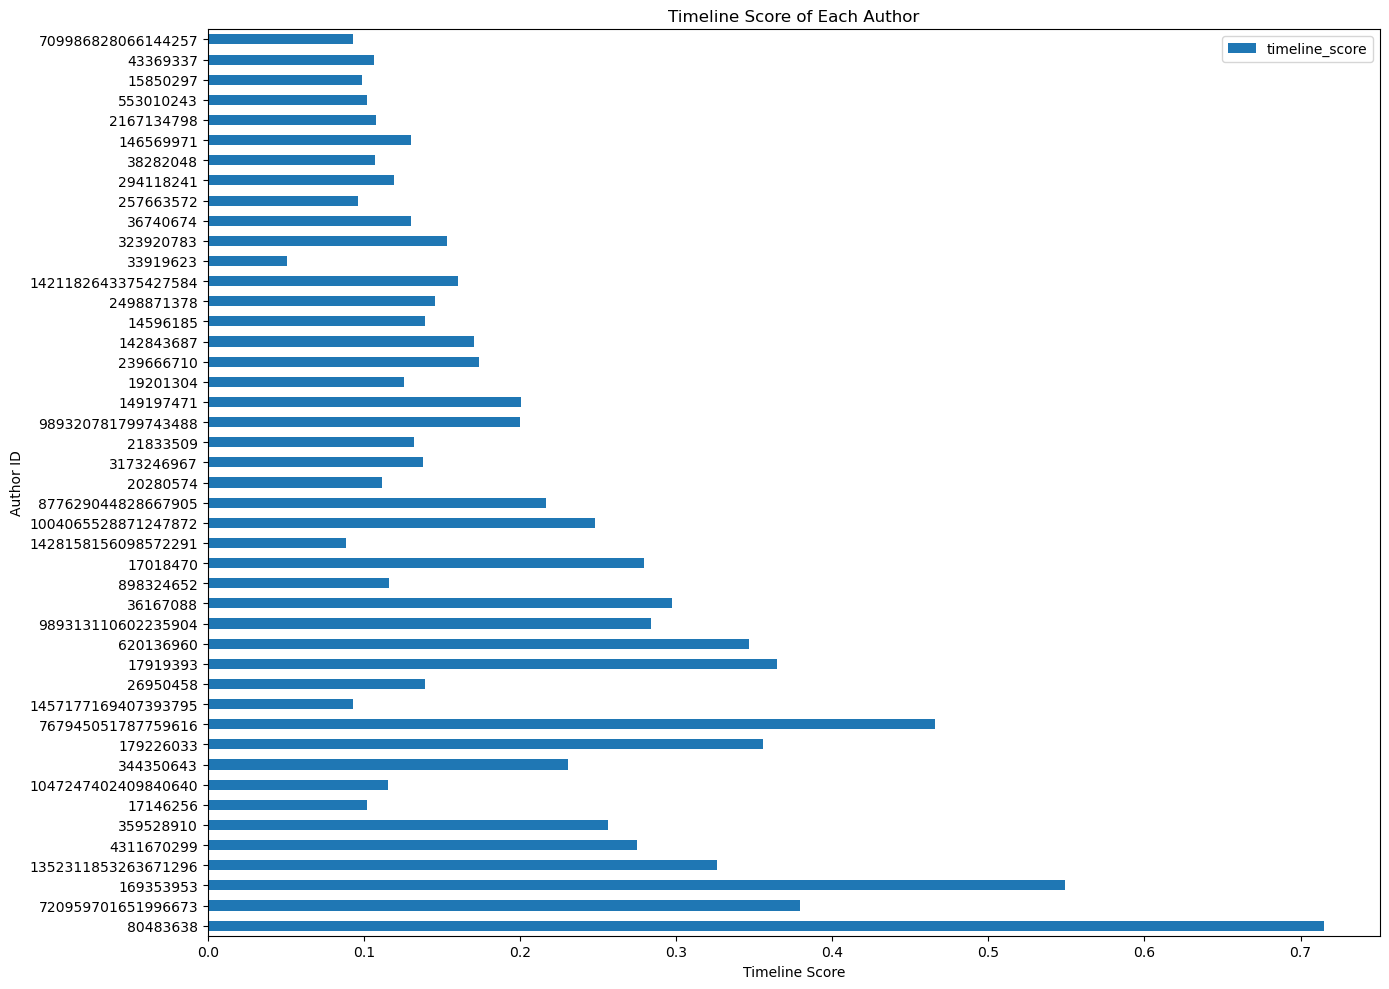

In [209]:
author_rrpp_data.plot(x='author_id', y='timeline_score', kind='barh', figsize=(14,10))
plt.xlabel('Timeline Score')
plt.ylabel('Author ID')
plt.title('Timeline Score of Each Author')
plt.tight_layout()
plt.show()


In [213]:
author_rrpp_data

,rr_per_post,author_id,last_tweet,last_tweet_norm,timeline_score
0,0.723192,80483638,2022-03-30 15:33:56+00:00,0.988831,0.715115
1,0.656250,720959701651996673,2022-02-08 23:01:34+00:00,0.578177,0.379429
2,0.571429,169353953,2022-03-27 05:27:40+00:00,0.960558,0.548890
3,0.500000,1352311853263671296,2022-02-17 22:58:21+00:00,0.652539,0.326269
4,0.500000,4311670299,2022-02-05 14:19:36+00:00,0.550388,0.275194
5,0.500000,359528910,2022-02-01 02:22:22+00:00,0.513214,0.256607
6,0.500000,17146256,2021-12-25 16:40:26+00:00,0.204089,0.102044
7,0.500000,1047247402409840640,2021-12-28 20:52:12+00:00,0.230327,0.115164
8,0.500000,344350643,2022-01-25 21:37:47+00:00,0.461994,0.230997
9,0.500000,179226033,2022-02-25 00:17:42+00:00,0.710845,0.355423


In [214]:

date_posts

,created_at,count,timeline_norm
0,2021-12-01 00:00:00+00:00,412,0.000000
1,2021-12-02 00:00:00+00:00,397,0.008264
2,2021-12-03 00:00:00+00:00,351,0.016529
3,2021-12-04 00:00:00+00:00,232,0.024793
4,2021-12-05 00:00:00+00:00,159,0.033058
...,...,...,...
117,2022-03-28 00:00:00+00:00,138,0.966942
118,2022-03-29 00:00:00+00:00,182,0.975207
119,2022-03-30 00:00:00+00:00,155,0.983471
120,2022-03-31 00:00:00+00:00,177,0.991736


In [265]:
before = []
after = []
for idx, row in author_rrpp_data.iterrows():
    author = row['author_id']
    last_tweet = row['last_tweet']
    avg_posts_before = date_posts[date_posts['created_at'] <= last_tweet]['count'].mean()
    avg_posts_after = date_posts[date_posts['created_at'] > last_tweet]['count'].mean()
    before.append(avg_posts_before)
    after.append(avg_posts_after)
before_after_df = pd.DataFrame({'author_id': author_rrpp_data['author_id'], 'avg_posts_before': before, 'avg_posts_after': after})
before_after_df.dropna(inplace=True)
before_after_df

,author_id,avg_posts_before,avg_posts_after
0,80483638,261.841667,106.000000
1,720959701651996673,333.642857,159.192308
2,169353953,264.495726,137.400000
3,1352311853263671296,318.417722,150.651163
4,4311670299,339.582090,161.472727
5,359528910,348.158730,164.389831
6,17146256,342.440000,237.855670
7,1047247402409840640,344.428571,233.925532
8,344350643,358.875000,174.787879
9,179226033,303.517241,149.342857


In [266]:
from scipy.stats import ttest_rel
t_stat, p_val = ttest_rel(before_after_df['avg_posts_before'], before_after_df['avg_posts_after'])
print(f"Student's t-test statistic: {t_stat}, two-sided p-value: {p_val}")

Student's t-test statistic: 31.640199504579634, two-sided p-value: 2.032341242562278e-31


In [267]:
from scipy.stats import ttest_rel
t_stat, p_val = ttest_rel(before_after_df['avg_posts_before'], before_after_df['avg_posts_after'])
print(f"t-statistic: {t_stat}, one-sided p-value: {p_val}")

t-statistic: 31.640199504579634, one-sided p-value: 2.032341242562278e-31


In [268]:
from scipy.stats import wilcoxon
stat, p_val = wilcoxon(before_after_df['avg_posts_before'], before_after_df['avg_posts_after'], alternative="greater")
print("Wilcoxon statistic:", stat, "p-value:", p_val)


Wilcoxon statistic: 990.0 p-value: 5.684341886080802e-14


In [258]:
before = []
after = []
for idx, row in author_rrpp_data.iterrows():
    author = row['author_id']
    last_tweet = row['last_tweet']
    two_days_after_last_tweet = last_tweet + pd.Timedelta(days=1)
    two_days_before_last_tweet = last_tweet - pd.Timedelta(days=1)
    avg_posts_before = date_posts[(date_posts['created_at'] <= last_tweet) & (date_posts['created_at'] >= two_days_before_last_tweet)]['count'].mean()
    avg_posts_after = date_posts[(date_posts['created_at'] > last_tweet) & (date_posts['created_at'] <= two_days_after_last_tweet)]['count'].mean()
    before.append(avg_posts_before)
    after.append(avg_posts_after)
before_after_df = pd.DataFrame({'author_id': author_rrpp_data['author_id'], 'avg_posts_before': before, 'avg_posts_after': after})
before_after_df.dropna(inplace=True)
before_after_df

,author_id,avg_posts_before,avg_posts_after
0,80483638,155.0,177.0
1,720959701651996673,215.0,270.0
2,169353953,86.0,138.0
3,1352311853263671296,192.0,199.0
4,4311670299,157.0,146.0
5,359528910,270.0,240.0
6,17146256,211.0,221.0
7,1047247402409840640,507.0,522.0
8,344350643,325.0,333.0
9,179226033,170.0,91.0


In [259]:
from scipy.stats import ttest_rel
t_stat, p_val = ttest_rel(before_after_df.iloc[:10]['avg_posts_before'], before_after_df.iloc[:10]['avg_posts_after'])
print(f"t-statistic: {t_stat}, one-sided p-value: {p_val}")

t-statistic: -0.3975456594205905, one-sided p-value: 0.7002291224534907


In [263]:
from scipy.stats import wilcoxon
stat, p_val = wilcoxon(before_after_df['avg_posts_before'], before_after_df['avg_posts_after'], alternative="greater")
print("Wilcoxon statistic:", stat, "p-value:", p_val)


Wilcoxon statistic: 506.0 p-value: 0.34501602864613945


In [272]:
df["author_id"].nunique()

3903